# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

#  Model deployment

In [2]:
#Defining paths
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [3]:
#Training model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [4]:
#Getting parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 128)     0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

# Training data 

In [5]:
#Moulding train images
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [6]:
#Reshaping test and validation images 
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [7]:
#Training the model
hist_new = model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
4/4 [==============================] - 81s 18s/step - loss: 0.9066 - accuracy: 0.5010 - val_loss: 0.6875 - val_accuracy: 0.5167
Epoch 2/10
4/4 [==============================] - 26s 6s/step - loss: 0.6576 - accuracy: 0.6188 - val_loss: 0.6622 - val_accuracy: 0.8500
Epoch 3/10
4/4 [==============================] - 25s 6s/step - loss: 0.5519 - accuracy: 0.7635 - val_loss: 0.4987 - val_accuracy: 0.8000
Epoch 4/10
4/4 [==============================] - 24s 6s/step - loss: 0.5836 - accuracy: 0.7271 - val_loss: 0.4770 - val_accuracy: 0.8667
Epoch 5/10
4/4 [==============================] - 25s 6s/step - loss: 0.4218 - accuracy: 0.8260 - val_loss: 0.4294 - val_accuracy: 0.9667
Epoch 6/10
4/4 [==============================] - 25s 6s/step - loss: 0.3264 - accuracy: 0.8938 - val_loss: 0.2346 - val_accuracy: 0.9667
Epoch 7/10
4/4 [==============================] - 26s 7s/step - loss: 0.2083 - accuracy: 0.9125 - val_loss: 0.1660 - val_accuracy: 0.9833
Epoch 8/10
4/4 [=================

In [8]:
#Getting summary
summary=hist_new.history
print(summary)

{'loss': [0.8896226286888123, 0.6502399444580078, 0.5166837573051453, 0.5375741124153137, 0.43248075246810913, 0.2983076274394989, 0.20856338739395142, 0.21408145129680634, 0.3318476974964142, 0.14179494976997375], 'accuracy': [0.53125, 0.6328125, 0.78125, 0.7578125, 0.8125, 0.8984375, 0.9296875, 0.9296875, 0.890625, 0.953125], 'val_loss': [0.6874538660049438, 0.662190854549408, 0.49867528676986694, 0.4770275056362152, 0.4294476807117462, 0.23459173738956451, 0.1659570336341858, 0.09870431572198868, 0.10892840474843979, 0.08240482956171036], 'val_accuracy': [0.5166666507720947, 0.8500000238418579, 0.800000011920929, 0.8666666746139526, 0.9666666388511658, 0.9666666388511658, 0.9833333492279053, 0.9666666388511658, 0.9833333492279053, 0.9833333492279053]}


In [9]:
model.save("model_covid.h5")

# Accuracy measure

In [11]:
model.evaluate(train_generator)

7/7 [==============================] - 10s 1s/step - loss: 0.1731 - accuracy: 0.9375


[0.17305420339107513, 0.9375]

In [12]:
print(model.evaluate_generator(validation_generator))

[0.08240483701229095, 0.9833333492279053]


## Confusion Matrix

In [13]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [14]:
y_actual, y_test = [],[]

In [15]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(pred[0,0])
    y_actual.append(1)
    

In [16]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(pred[0,0])
    y_actual.append(0)
    pred

In [17]:
model.predict(img)

array([[0.]], dtype=float32)

In [18]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)
cn

array([[30,  0],
       [ 2, 28]], dtype=int64)

<AxesSubplot:>

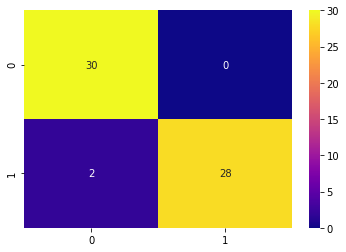

In [21]:
sns.heatmap(cn,cmap="plasma",annot=True) #0: Covid ; 1: Normal